In [1]:
import pandas as pd
import re
import time
import matplotlib.pyplot as plt
import numpy as np

i=0 ## batch counter

n=10000

In [2]:
chunks = pd.read_json("downloads/corpus-webis-tldr-17.json", lines=True, chunksize = n,encoding='utf-8')
for c in chunks:
    if i%n == 0:
        if i ==0:
            df = c.loc[:,['content_len','summary_len','id','subreddit','subreddit_id','title']].reset_index(drop=True)
    else:
        df = df.append(c.loc[:,['content_len','summary_len','id','subreddit','subreddit_id','title']]
                       ,ignore_index=True)
    if i % 50 ==0:
        print('currently processing: ', i)
    i=i+1
### save the last one
print('Done processing with length.')

currently processing:  0
currently processing:  50
currently processing:  100
currently processing:  150
currently processing:  200
currently processing:  250
currently processing:  300
currently processing:  350
Done processing with length.


In [3]:
lines = len(df)
lines

3848330

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

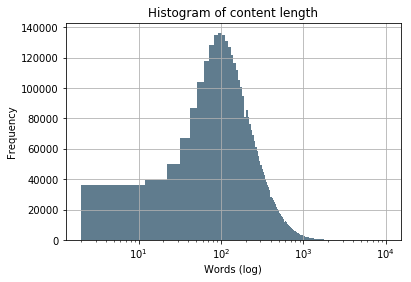

In [23]:
df['content_len'].plot.hist(grid=True, bins=1000,color='#607c8e',logx = True)
plt.title('Histogram of content length')
plt.xlabel('Words (log)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

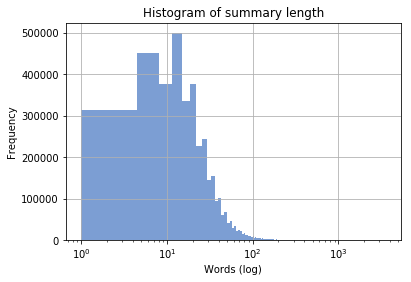

In [24]:
df['summary_len'].plot.hist(grid=True, bins=1000,color='#7c9ed3',logx = True)
plt.title('Histogram of summary length')
plt.xlabel('Words (log)')
plt.ylabel('Frequency')

In [25]:
df['content_len'].describe(include='all').apply(lambda x: format(x, 'f'))

count    3848330.000000
mean         271.930963
std          273.008506
min            2.000000
25%          106.000000
50%          189.000000
75%          341.000000
max         9952.000000
Name: content_len, dtype: object

In [26]:
df['summary_len'].describe(include='all').apply(lambda x: format(x, 'f'))

count    3848330.000000
mean          26.169619
std           33.170301
min            1.000000
25%           10.000000
50%           18.000000
75%           31.000000
max         3525.000000
Name: summary_len, dtype: object

In [28]:
df.head()

,content_len,summary_len,id,subreddit,subreddit_id,title
0,178,8,c69al3r,math,t5_2qh0n,NaN
1,148,4,c6a9nxd,funny,t5_2qh33,NaN
2,76,73,c6acx4l,Borderlands,t5_2r8cd,NaN
3,213,19,c8onqew,gamingpc,t5_2sq2y,NaN
4,404,7,c6acxvc,Diablo,t5_2qore,D2 help?


In [30]:
id_ = df.loc[:,['id','subreddit']]
id_.head()

,id,subreddit
0,c69al3r,math
1,c6a9nxd,funny
2,c6acx4l,Borderlands
3,c8onqew,gamingpc
4,c6acxvc,Diablo


In [32]:
sub = id_.groupby(['subreddit']).count()

In [39]:
sub = sub.sort_values('id', ascending=False)
sub[:20]

,id
subreddit,
AskReddit,589947
relationships,352049
leagueoflegends,109307
tifu,52219
relationship_advice,50416
trees,47286
gaming,43851
atheism,43268
AdviceAnimals,40783


In [100]:
sub['id'].describe(include='all').apply(lambda x: format(x, 'f'))

count     29650.000000
mean        129.787319
std        4169.846651
min           1.000000
25%           1.000000
50%           2.000000
75%           9.000000
max      589947.000000
Name: id, dtype: object

In [93]:
labels_sub = sub.index[:30].tolist()
counts_sub = sub['id'][:10].tolist()
labels_sub.append('others')
other_counts = np.array(sub['id'][10:].tolist())
all_others = other_counts.sum()
counts_sub.append(all_others)

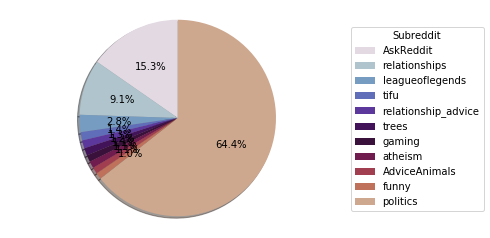

<Figure size 1440x1080 with 0 Axes>

In [97]:
from matplotlib import cm

cs=cm.twilight(np.arange(21)*45)

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(counts_sub, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = cs)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(wedges, labels_sub,
          title="Subreddit",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.figure(figsize=(20,15))
plt.show()


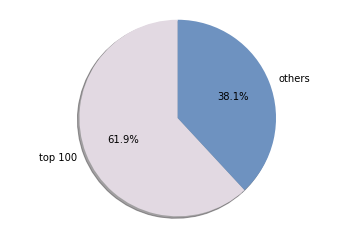

<Figure size 1440x1080 with 0 Axes>

In [101]:
labels_sub = ['top 100','others']
counts_sub = [np.array(sub['id'][:100].tolist()).sum(),np.array(sub['id'][100:].tolist()).sum()]

cs=cm.twilight(np.arange(2)*100)

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(counts_sub, labels = labels_sub, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = cs)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(20,15))
plt.show()
